In [1]:
# before run the demo, enabling GPU in Colab is required!
!nvidia-smi

Mon Feb 14 12:23:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/tjqansthd/LapDepth-release.git
# change directory to LapDepth soruce
%cd LapDepth-release
!ls

Cloning into 'LapDepth-release'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 132 (delta 53), reused 35 (delta 2), pack-reused 0
Receiving objects: 100% (132/132), 25.01 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/LapDepth-release
calculate_error.py  eval.py  logger.py	README.md   transform_list.py
datasets	    example  model.py	trainer.py  utils.py
demo.py		    LICENSE  option.py	train.py


In [3]:
# install requirement package
!pip install geffnet
!pip install path
!pip install IPython
!pip install blessings
!pip install progressbar

     |████████████████████████████████| 40 kB 3.5 MB/s 
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=e7bf37227412c59ac6006cc629b68ffd08c761f42c9120bd9b8b05791a3dc3f6
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar


In [4]:
# download pre-trained model from 'https://github.com/tjqansthd/LapDepth-release'
# and upload to your google drive

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# pre-trained model should be located in '/content/drive/MyDrive/...'

Mounted at /content/drive


In [5]:
# test the model pretrained on KITTI dataset
# pre-trained with data loss                  : LDRN_KITTI_ResNext101_pretrained_data.pkl
# pre-trained with data loss + gradient loss  : LDRN_KITTI_ResNext101_pretrained_data_grad.pkl
!python demo.py --model_dir /content/drive/MyDrive/LDRN_KITTI_ResNext101_pretrained_data_grad.pkl --img_dir ./example/kitti_demo.jpg --pretrained KITTI --cuda --gpu_num 0

=> on CUDA
=> loading model..
Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-8ba56ff5.pth
100% 340M/340M [00:04<00:00, 73.0MB/s]
==> Norm: BN
=> process..
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation o

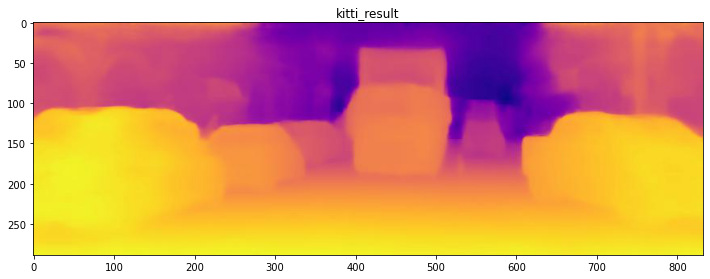

In [6]:
# visuallize the result image
import matplotlib.pyplot as plt

result_from_kitti = plt.imread("./out_kitti_demo.jpg")
plt.figure(figsize=(12, 8))
plt.title('kitti_result')
plt.imshow(result_from_kitti)


In [7]:
plt.close('all')

# test the model pretrained on NYU Depth V2 dataset
# pre-trained model  : LDRN_NYU_ResNext101_pretrained_data.pkl
!python demo.py --model_dir /content/drive/MyDrive/LDRN_NYU_ResNext101_pretrained_data.pkl --img_dir ./example/nyu_demo.jpg --pretrained NYU --cuda --gpu_num 0


=> on CUDA
=> loading model..
==> Norm: BN
=> process..
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
=> Done.


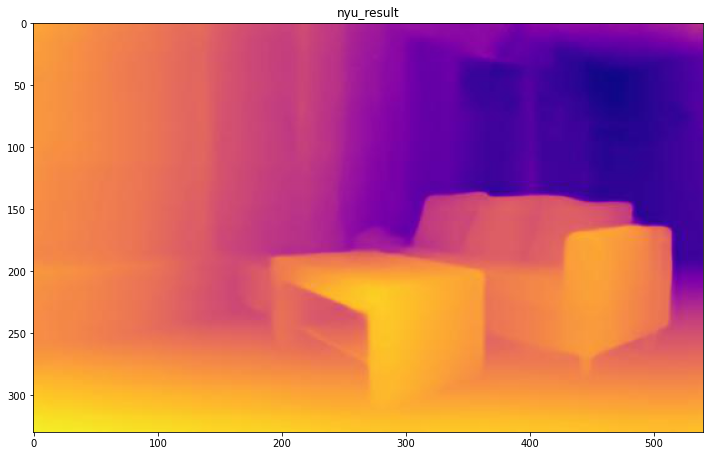

In [8]:
# visuallize the result image

result_from_nyu = plt.imread("./out_nyu_demo.jpg")
plt.figure(figsize=(12, 8))
plt.title('nyu_result')
plt.imshow(result_from_nyu)

In [9]:
plt.close('all')